In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dt=pd.read_csv('Downloads/telecom_churn_data1.csv')
dt.head(5)
dt[dt['State']=='AL'].groupby('State')['CustServ Calls'].sum()
#dt[dt['State']=='CT'].groupby('State')['CustServ Calls'].sum()

State
AL    166
Name: CustServ Calls, dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
dt['Vmail Plan'] = enc.fit_transform(dt['Vmail Plan'])

In [4]:
dt['Churn']=enc.fit_transform(dt['Churn'])

In [5]:
dt['International Plan']=enc.fit_transform(dt['International Plan'])

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                   4617 non-null object
Account Length          4617 non-null int64
Area Code               4617 non-null int64
Phone                   4617 non-null object
International Plan      4617 non-null int32
Vmail Plan              4617 non-null int32
Vmail Message           4617 non-null int64
Day Min                 4617 non-null float64
Day Calls               4617 non-null int64
Day Charge              4617 non-null float64
Eve min                 4617 non-null float64
Eve Calls               4617 non-null int64
Eve Charge              4617 non-null float64
Night Min               4617 non-null float64
Night Calls             4617 non-null int64
Night Charge            4617 non-null float64
Interational Min        4617 non-null float64
International Call      4617 non-null int64
International Charge    4617 non-null float64
CustServ Calls          4617 non-null i

In [7]:
dt.head(2)

,State,Account Length,Area Code,Phone,International Plan,Vmail Plan,Vmail Message,Day Min,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Min,Night Calls,Night Charge,Interational Min,International Call,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [8]:
dt.describe()

,Account Length,Area Code,International Plan,Vmail Plan,Vmail Message,Day Min,Day Calls,Day Charge,Eve min,Eve Calls,Eve Charge,Night Min,Night Calls,Night Charge,Interational Min,International Call,International Charge,CustServ Calls,Churn
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,0.096600,0.267706,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035,0.142084
std,39.597194,42.288212,0.295444,0.442812,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019,0.349174
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [10]:
dt.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'Vmail Plan', 'Vmail Message', 'Day Min', 'Day Calls', 'Day Charge',
       'Eve min', 'Eve Calls', 'Eve Charge', 'Night Min', 'Night Calls',
       'Night Charge', 'Interational Min', 'International Call',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

In [11]:
#Gettin th e Summary of non-churns i.e where Churn=0

a=dt[dt['Churn']==0]
a.describe()


,Account Length,Area Code,International Plan,Vmail Plan,Vmail Message,Day Min,Day Calls,Day Charge,Eve min,Eve Calls,Eve Charge,Night Min,Night Calls,Night Charge,Interational Min,International Call,International Charge,CustServ Calls,Churn
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.0
mean,100.354456,436.839939,0.065640,0.287554,8.385761,176.000252,99.922747,29.920624,198.638425,100.164100,16.884509,199.734158,99.998233,8.988147,10.206665,4.479677,2.756319,1.455693,0.0
std,39.730171,42.163925,0.247683,0.452679,13.848080,49.810857,19.691114,8.467761,50.157997,19.822172,4.263431,50.641107,19.907000,2.278872,2.746420,2.434320,0.741455,1.163901,0.0
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.0
25%,73.000000,408.000000,0.000000,0.000000,0.000000,142.900000,87.000000,24.290000,164.300000,87.000000,13.970000,166.100000,87.000000,7.470000,8.500000,3.000000,2.300000,1.000000,0.0
50%,100.000000,415.000000,0.000000,0.000000,0.000000,178.100000,100.000000,30.280000,199.200000,101.000000,16.930000,199.300000,100.000000,8.970000,10.300000,4.000000,2.780000,1.000000,0.0
75%,127.000000,415.000000,0.000000,1.000000,21.000000,211.100000,113.000000,35.890000,232.400000,113.000000,19.750000,233.700000,113.000000,10.520000,12.000000,6.000000,3.240000,2.000000,0.0
max,243.000000,510.000000,1.000000,1.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,19.700000,19.000000,5.320000,8.000000,0.0


In [12]:
#getting summary of Churns i.e where churn != 0
b=dt[dt['Churn']==1]
b.describe()


,Account Length,Area Code,International Plan,Vmail Plan,Vmail Message,Day Min,Day Calls,Day Charge,Eve min,Eve Calls,Eve Charge,Night Min,Night Calls,Night Charge,Interational Min,International Call,International Charge,CustServ Calls,Churn
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.0
mean,102.400915,438.292683,0.283537,0.147866,4.614329,207.298018,100.849085,35.241098,211.241311,100.274390,17.955671,205.996494,99.617378,9.269939,10.717835,4.157012,2.894314,2.239329,1.0
std,38.768004,43.042635,0.451058,0.355238,11.418575,68.523425,21.002801,11.649101,51.637138,19.830989,4.389078,49.650994,20.115808,2.234340,2.784637,2.578486,0.751801,1.822432,0.0
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,42.000000,2.130000,0.000000,0.000000,0.000000,0.000000,1.0
25%,76.000000,408.000000,0.000000,0.000000,0.000000,153.900000,88.000000,26.162500,174.800000,87.000000,14.860000,171.775000,84.000000,7.730000,8.900000,2.000000,2.400000,1.000000,1.0
50%,103.000000,415.000000,0.000000,0.000000,0.000000,214.150000,101.000000,36.405000,210.200000,100.000000,17.870000,206.450000,100.000000,9.290000,10.600000,4.000000,2.860000,2.000000,1.0
75%,126.000000,510.000000,1.000000,0.000000,0.000000,265.525000,115.000000,45.142500,249.225000,114.000000,21.182500,241.025000,115.000000,10.850000,12.800000,5.000000,3.460000,4.000000,1.0
max,225.000000,510.000000,1.000000,1.000000,48.000000,351.500000,165.000000,59.760000,363.700000,168.000000,30.910000,381.600000,158.000000,17.170000,20.000000,20.000000,5.400000,9.000000,1.0


In [13]:
#plt.bar(a['Day Charge'].head(20),a['Phone'].head(20),width=0.8)
#plt.show()


In [14]:
len(a) # getting the number of non-churns

3961

In [15]:
len(b) # getting the number of Churns

656

<BarContainer object of 2 artists>

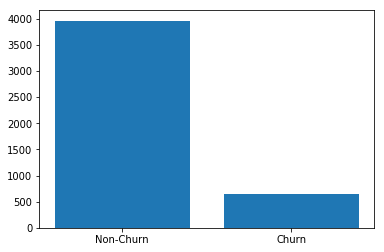

In [16]:
# below we can see that number of curns are fairly less than number of non-churns
plt.bar(['Non-Churn','Churn'],[3961,656])

In [17]:
#getting means from Non-Churns(description table)

print("mean vmail messages for Churn  'No' customers:       "+str(a.describe().iloc[1,4]))

print("mean Customer Service  for Churn  'No' customers:    "+str(a.describe().iloc[1,17]))


mean vmail messages for Churn  'No' customers:       8.385761171421358
mean Customer Service  for Churn  'No' customers:    1.4556930068164604


In [17]:
#getting means from Churns(description table)
print("mean vmail messages for Churn  'Yes' customers:       "+str(b.describe().iloc[1,4]))
print("mean Customer Service  for Churn  'Yes' customers:    "+str(b.describe().iloc[1,17]))

mean vmail messages for Churn  'Yes' customers:       4.614329268292683
mean Customer Service  for Churn  'Yes' customers:    2.239329268292683


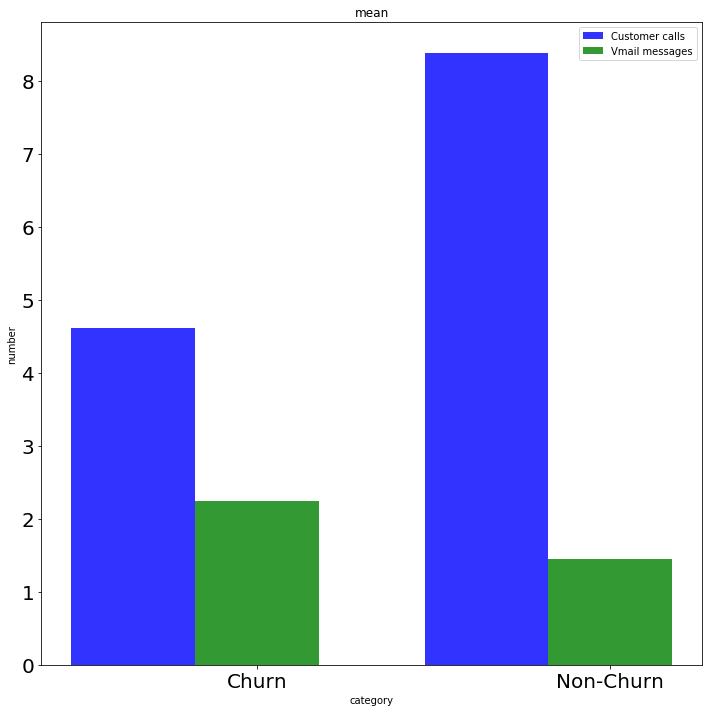

In [78]:
# plotting Means
category=['Churns','Non_Churns']
mean_v_messages=[str(b.describe().iloc[1,4]),str(a.describe().iloc[1,4])]
mean_c_service=[str(b.describe().iloc[1,17]),str(a.describe().iloc[1,17])]

#plt.bar(category,mean_v_messages)

# data to plot
n_groups = 2
means_frank = [b.describe().iloc[1,4],a.describe().iloc[1,4]]
means_guido = [b.describe().iloc[1,17],a.describe().iloc[1,17]]
means_dd=[b.describe().iloc[1,4],b.describe().iloc[1,4]]
means_ff= [b.describe().iloc[1,4],b.describe().iloc[1,17]]
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Customer calls')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='Vmail messages')

#plt.rcParams["figure.figsize"]=[10,10])
plt.xlabel('category')
plt.ylabel('number')
plt.title('mean')
plt.xticks(index + bar_width, ('Churn', 'Non-Churn', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()


In [79]:
print("in the above graph, we can see that chrun customers did lesser number of customer calls. It indicates to the fact that churning customers are not satisfied of customer care responce , hence , they left!")

in the above graph, we can see that chrun customers did lesser number of customer calls. It indicates to the fact that churning customers are not satisfied of customer care responce , hence , they left!


Text(0.5, 1.0, 'Churns in different States')

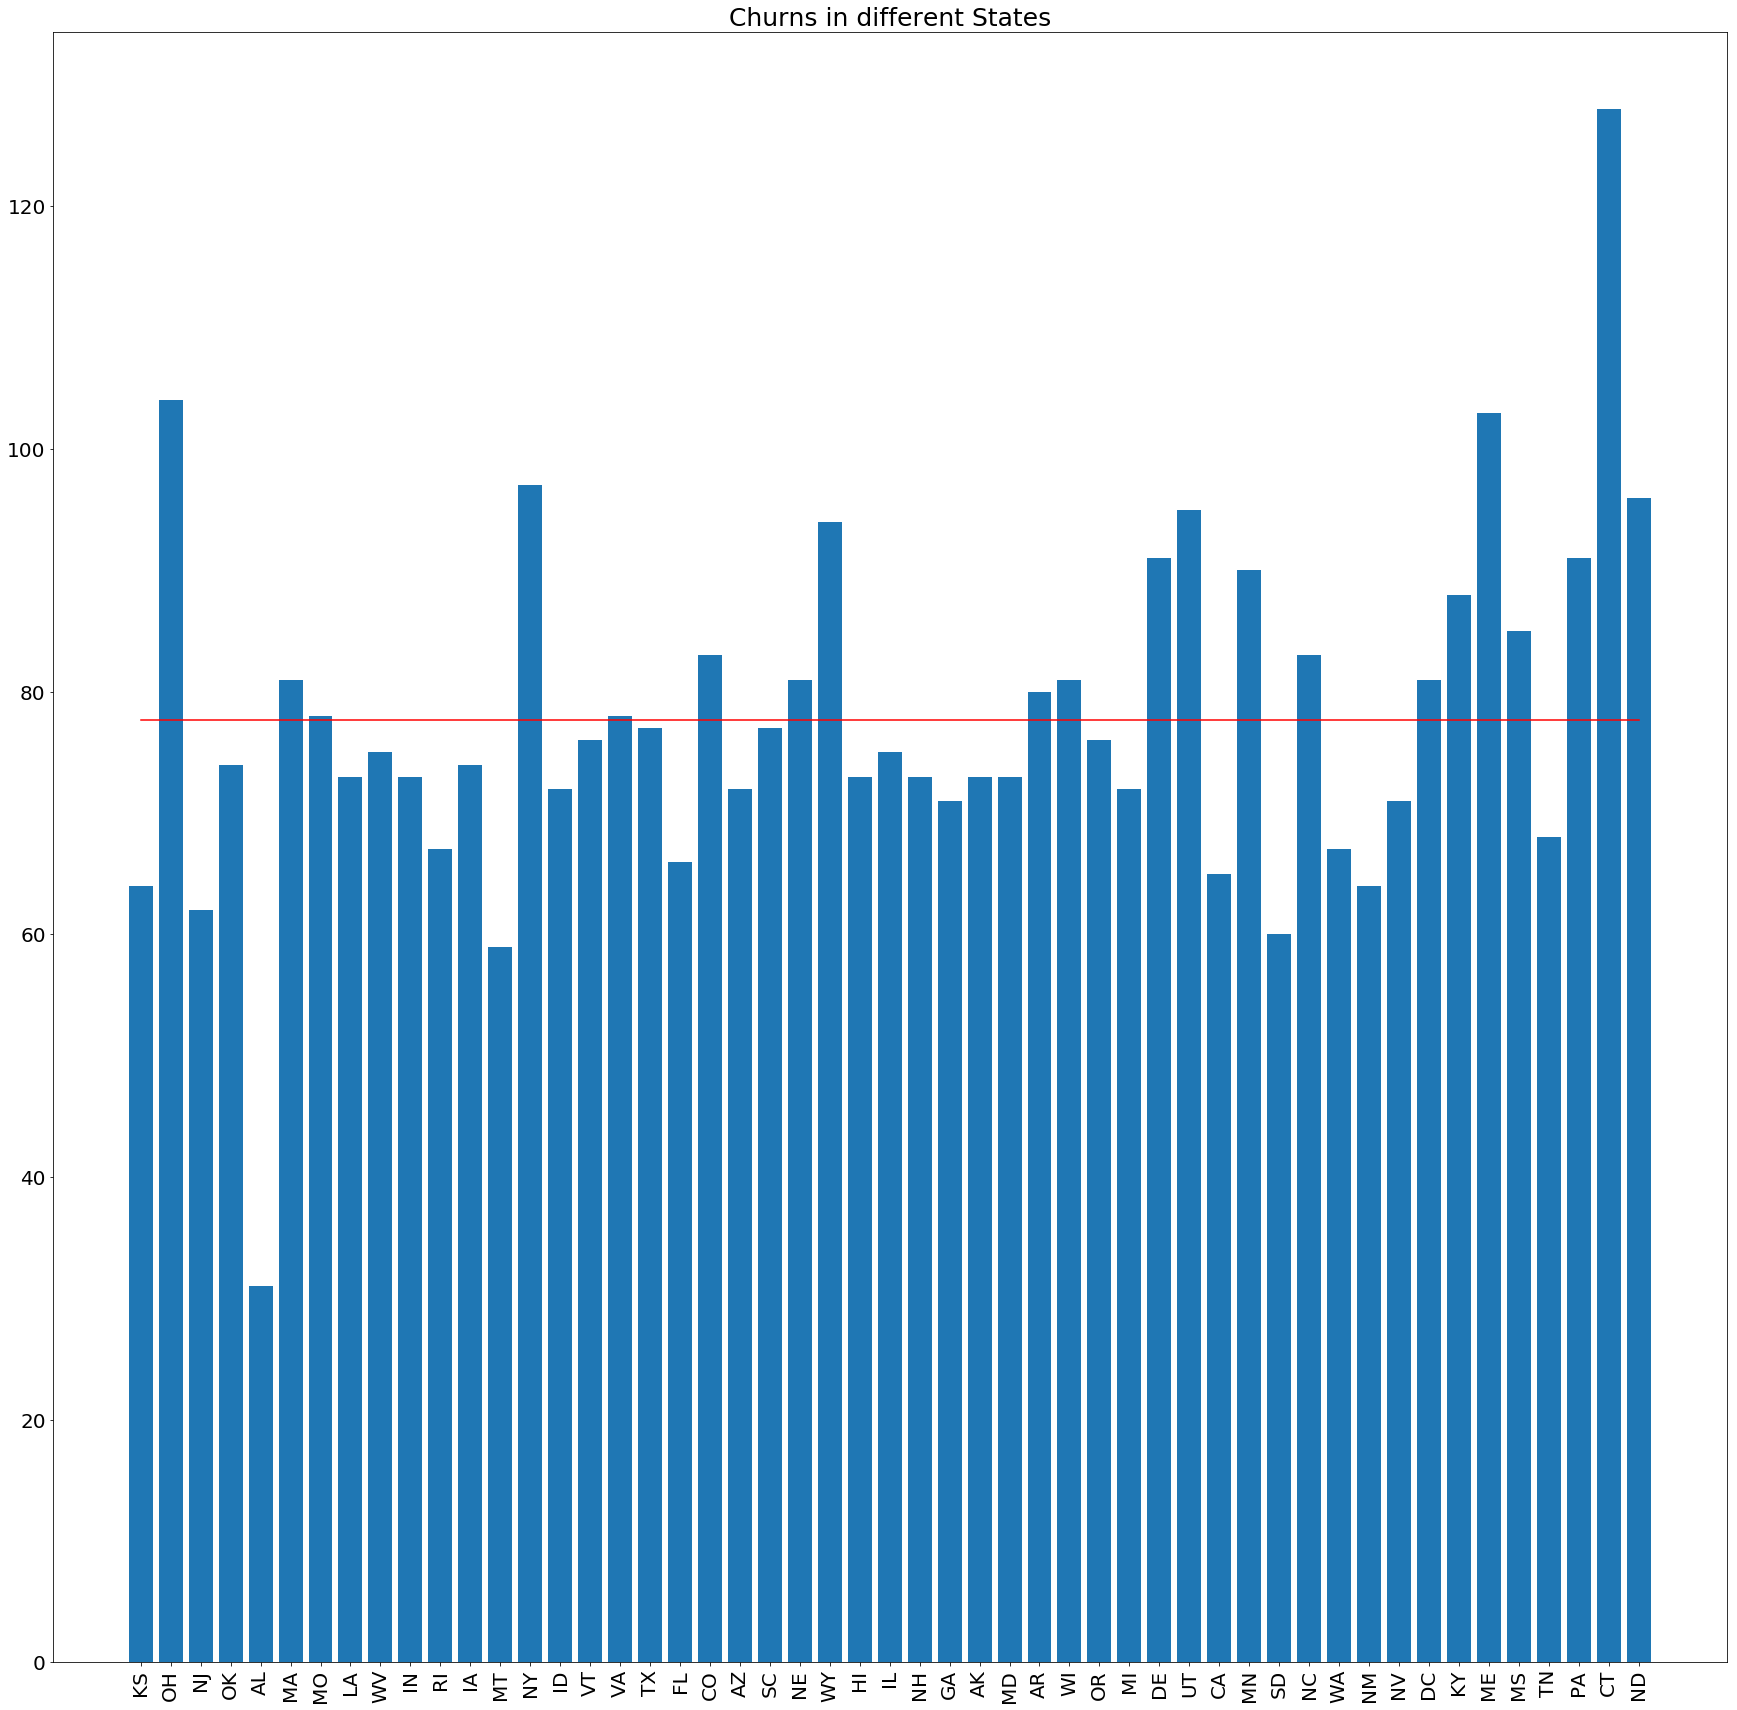

In [31]:
#dt.groupby('State')['Churn'].value_counts()
ak=dt[dt['Churn']==0].groupby('State')['State'].value_counts()
aa=pd.DataFrame(ak)
plt.bar(dt.State.unique(),ak)
plt.xticks(rotation='vertical')
plt.rc('xtick', labelsize='20')
plt.rc('ytick', labelsize='20')
plt.rcParams["figure.figsize"]=[30,30]
q=[np.average(ak)]*len(dt.State.unique())
plt.plot(q,color='red',label='average')
plt.title('Churns in different States',size='25')
#in the graph below , red live shows tHE ANERAGE COUNT OF CHURNERS


In [20]:
# LETS SEPERATE ABOVE AND BELOW AVERAGE LIST OF CHURNERS!\
above=aa[aa['State']>np.average(ak)]
below=aa[aa['State']<np.average(ak)]
print("The states in which Churners are above average are : \n "+ str(above['State']))

The states in which Churners are above average are : 
 State  State
AL     AL       104
CO     CO        81
CT     CT        78
ID     ID        97
KS     KS        78
MA     MA        83
MI     MI        81
MN     MN        94
NH     NH        80
NJ     NJ        81
NY     NY        91
OH     OH        95
OR     OR        90
RI     RI        83
TX     TX        81
UT     UT        88
VA     VA       103
VT     VT        85
WI     WI        91
WV     WV       128
WY     WY        96
Name: State, dtype: int64


In [21]:
# trimming only the required columns for training
X=dt.iloc[:,6:20]
y=dt.iloc[:,20]
X

,Vmail Message,Day Min,Day Calls,Day Charge,Eve min,Eve Calls,Eve Charge,Night Min,Night Calls,Night Charge,Interational Min,International Call,International Charge,CustServ Calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
6,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
7,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
8,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
9,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.3 ,random_state=100)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier




modes={'Support Vector'                    : SVC(),
             'Decision Tree'               : DecisionTreeClassifier(),    
             'Logistic Regression'         : LogisticRegression(),
             'Random Forest'               : RandomForestClassifier(), 
      }

for name,model in modes.items():
    mdl=model
    mdl.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    print(str(name)+"             "+str(score))


#mdl =RandomForestClassifier()

C:\Users\User\Anaconda33\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector             0.8694083694083694
Decision Tree             0.8672438672438673
Logistic Regression             0.8672438672438673
Random Forest             0.9163059163059163


C:\Users\User\Anaconda33\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda33\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
mdl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
predict=mdl.predict(X_test)

In [26]:
pd.DataFrame(predict)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,predict)

0.9199134199134199

In [28]:
confusion_matrix(y_test,predict)

array([[1186,   19],
       [  92,   89]], dtype=int64)

In [33]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1205
           1       0.82      0.49      0.62       181

   micro avg       0.92      0.92      0.92      1386
   macro avg       0.88      0.74      0.79      1386
weighted avg       0.91      0.92      0.91      1386



In [57]:
#fine Tuning the model for the perfection.

#tuning number of features
from sklearn.model_selection import GridSearchCV
p_grid={'max_features':['auto','sqrt','log2']}
#p_grid = {'max_features': ['auto', 'sqrt', 'log2']}

grid_search=GridSearchCV(mdl,p_grid)
grid_search.fit(X,y)
print(grid_search.best_params_)


C:\Users\User\Anaconda33\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_features': 'log2'}


In [105]:
#tuning the hyper parameters
# Create the dictionaty of hyperparameter grid.
p_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search=GridSearchCV(mdl,p_grid)
grid_search.fit(X,y)
import#printing final best parameters
print(grid_search.best_params_)

SyntaxError: invalid syntax (<ipython-input-105-9b18946bcfa8>, line 10)

In [106]:
#import random as rd

# Import RandomizedSearchCV
#from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
#p_distrib = {"max_depth": [3, None],
#              "max_features": rd.randint(1, 11),
#             "bootstrap": [True, False],
#              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
#rdm_search = RandomizedSearchCV(mdl, p_distrib)

# Fit the model
#rdm_search.fit(X, y)

# Print best parameters
#print(random_search.best_params_)

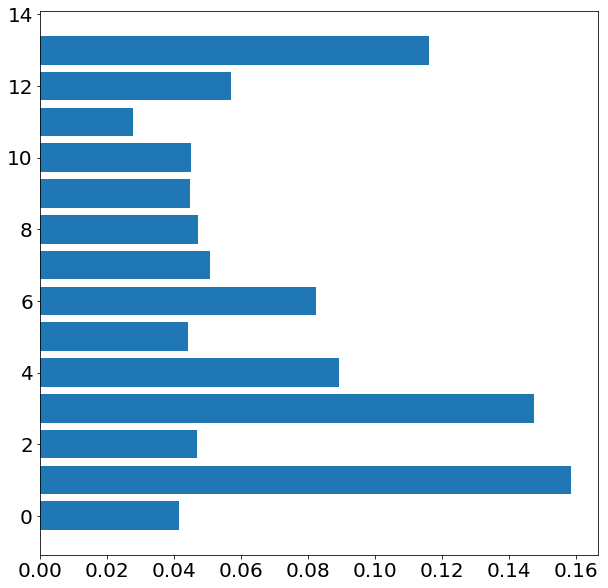

In [108]:
#  feature importances to find churn contributing factor

importances = mdl.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

Index(['International Call', 'Vmail Message', 'Eve Calls', 'Night Charge',
       'Interational Min', 'Day Calls', 'Night Calls', 'Night Min',
       'International Charge', 'Eve Charge', 'Eve min', 'CustServ Calls',
       'Day Charge', 'Day Min'],
      dtype='object')


<BarContainer object of 14 artists>

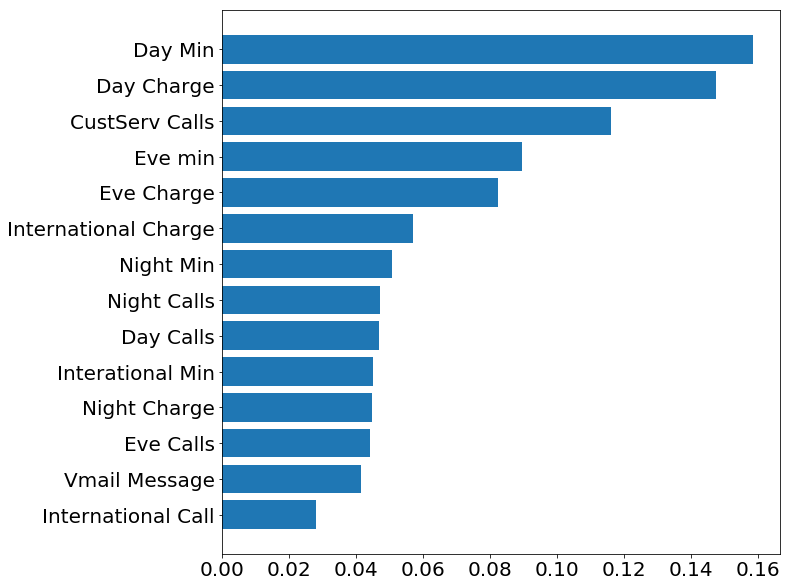

In [117]:
#getting the features in order and labeling them to make more readable

sortted=np.argsort(importances) 
labels=X.columns[sortted]
print(labels)


plt.barh(range(X.shape[1]),importances[sortted],tick_label=labels) # bar graph of sorted importances

In [119]:
print("therefore , Day min ,day_charge,custserv_calls are top3 important features in predicting the churn for the model.")

therefore , Day min ,day_charge,custserv_calls are top3 important features in predicting the churn for the model.


In [128]:
# exporting the sklearn's trained model onto a file using pickle

import pickle as p
with open('shubhs_mdl','wb') as f:
    p.dump(mdl,f)


In [131]:
# testing the exported model
with open('shubhs_mdl','rb') as f:
    imported=p.load(f)
print(str(mdl.predict(X_test))==str(imported.predict(X_test)))

True
